In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

# Unduh dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dataset_path = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

In [17]:
import os

base_dir = 'data/cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_generator = train_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')



Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator) // 32)


d:\Kuliah MTI\semesta 3\advance-computer-vision\computer-vision-with-tesorflow\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 63/100 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5150 - loss: 0.9915

d:\Kuliah MTI\semesta 3\advance-computer-vision\computer-vision-with-tesorflow\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
d:\Kuliah MTI\semesta 3\advance-computer-vision\computer-vision-with-tesorflow\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 752ms/step - accuracy: 0.5141 - loss: 0.9107 - val_accuracy: 0.5312 - val_loss: 0.6900
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 375ms/step - accuracy: 0.5430 - loss: 0.6886 - val_accuracy: 0.4688 - val_loss: 0.6949
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 388ms/step - accuracy: 0.5564 - loss: 0.6861 - val_accuracy: 0.5625 - val_loss: 0.6112
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 381ms/step - accuracy: 0.5989 - loss: 0.6546 - val_accuracy: 0.4375 - val_loss: 0.7178
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.6348 - loss: 0.6306 - val_accuracy: 0.5312 - val_loss: 0.7381
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 393ms/step - accuracy: 0.6532 - loss: 0.6238 - val_accuracy: 0.6875 - val_loss: 0.5625
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 384ms/step - accuracy: 0.6623 - loss: 0.6179 - val_accuracy: 0.6562 - val_loss: 0.5891
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 387ms/step - accuracy: 0.6935 - loss: 0.5951 - val

In [20]:
eval_result = model.evaluate(validation_generator)
print(f"Validation Accuracy: {eval_result[1]*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - accuracy: 0.6809 - loss: 0.5974
Validation Accuracy: 67.20%


In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

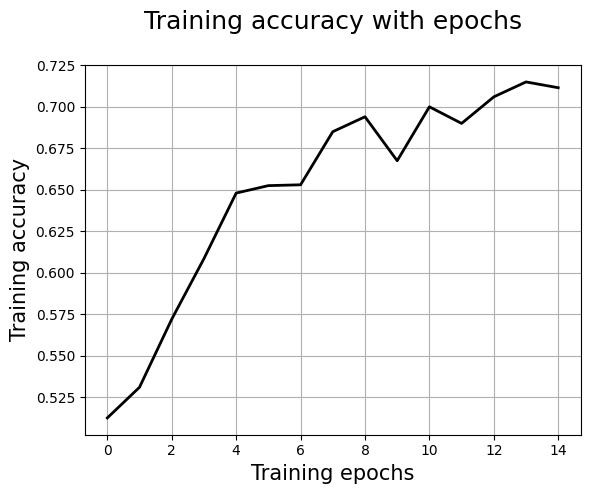

In [35]:
plt.plot(history.history['accuracy'],c='k',lw=2)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


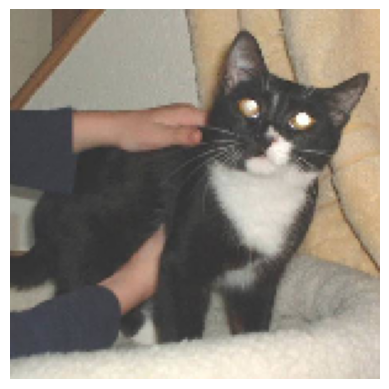

cat.2000.jpg: Gambar menunjukkan **Kucing** dengan probabilitas 0.71
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


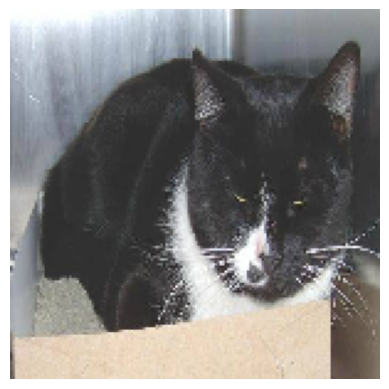

cat.2001.jpg: Gambar menunjukkan **Kucing** dengan probabilitas 0.86
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


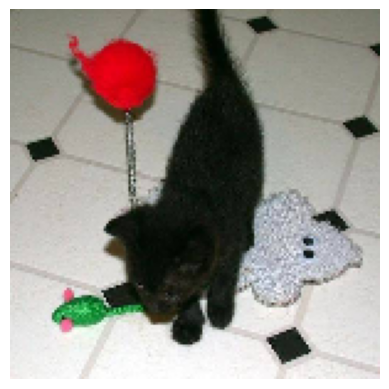

cat.2002.jpg: Gambar menunjukkan **Kucing** dengan probabilitas 0.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


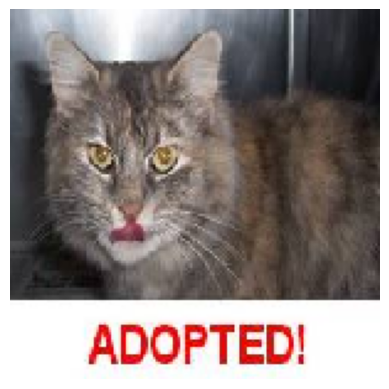

cat.2003.jpg: Gambar menunjukkan **Kucing** dengan probabilitas 0.96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


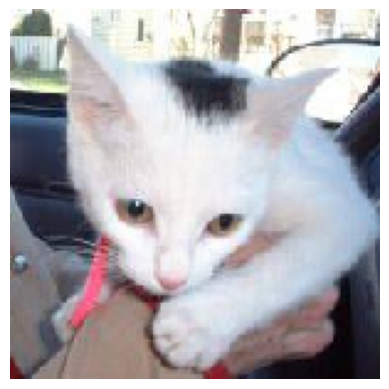

cat.2004.jpg: Gambar menunjukkan **Kucing** dengan probabilitas 0.53


In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_path = os.path.join(validation_dir, 'cats')  # Contoh folder
test_images = os.listdir(test_path)

# Prediksi gambar
for img_name in test_images[:5]:  # Batasi ke 5 gambar
    img_path = os.path.join(test_path, img_name)
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    if prediction[0] > 0.5:
        print(f"{img_name}: Gambar menunjukkan **Anjing** dengan probabilitas {prediction[0][0]:.2f}")
    else:
        print(f"{img_name}: Gambar menunjukkan **Kucing** dengan probabilitas {1 - prediction[0][0]:.2f}")
